In [1]:
# load libraries
%matplotlib inline
from utils import *
import nltk
from nltk.corpus import stopwords
from time import time

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.shape, test.shape

((159571, 8), (153164, 2))

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train[:4]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0


In [8]:
# about ~10% of comments are negative
label_cols = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
train[label_cols].max(axis=1).mean()

0.10167887648758234

In [12]:
# Text cleaning helper function
def clean_text(raw):  return re.sub(r'[^\w\s\']+', '', raw.strip()).lower().split()

In [13]:
print "Cleaning the comment texts..."
t0 = time()
train_cln = train['comment_text'].apply(clean_text)
test_cln = test['comment_text'].apply(clean_text)
print "Elapsed time %.2f seconds for cleaning\n" % (time()-t0)

Cleaning the comment texts...
Elapsed time 13.90 seconds for cleaning



In [21]:
nb_rev_trn, seq_len_trn = range(len(train_cln)), train_cln.apply(len)
nb_rev_tt, seq_len_tt = range(len(test_cln)), test_cln.apply(len)

In [22]:
seq_len_trn.describe()

count    159571.000000
mean         66.145076
std          98.280503
min           1.000000
25%          16.000000
50%          35.000000
75%          74.000000
max        1403.000000
Name: comment_text, dtype: float64

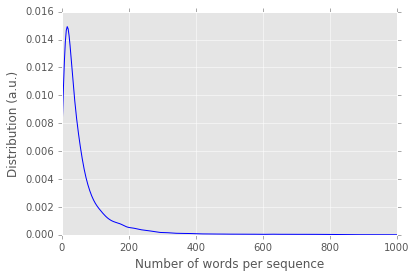

In [23]:
plt.style.use('ggplot')
seq_len_trn.plot.density(color='blue')
plt.xlim(0, 1000)
plt.xlabel('Number of words per sequence')
plt.ylabel('Distribution (a.u.)')
plt.show()

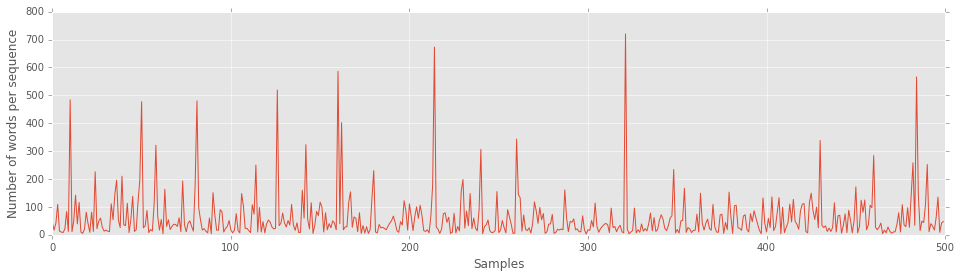

In [24]:
# see the lengths of sequence in a range
plt.figure(figsize=(16,4))
plt.plot(nb_rev_trn[:500], seq_len_trn[:500])
plt.xlim(0, 500)
plt.xlabel('Samples')
plt.ylabel('Number of words per sequence')
plt.show()

In [25]:
seq_len_tt.describe()

count    153164.000000
mean         59.092274
std          95.856773
min           0.000000
25%          12.000000
50%          29.000000
75%          65.000000
max        2142.000000
Name: comment_text, dtype: float64

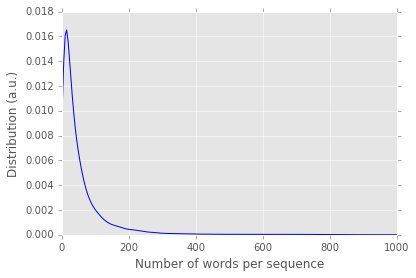

In [26]:
plt.style.use('ggplot')
seq_len_tt.plot.density(color='blue')
plt.xlim(0, 1000)
plt.xlabel('Number of words per sequence')
plt.ylabel('Distribution (a.u.)')
plt.show()

Observe comment texts cleaned to nearly no word

In [26]:
np.array(list(train_cln[train_cln.apply(len)==1].index))

array([  2629,   5670,   5899,   6746,  17311,  19815,  22099,  39247,  41648,  52442,  52475,
        53787,  55751,  61758,  63104,  64904,  68938,  76037,  79405,  83854,  93586,  96479,
        98792, 105657, 106891, 109944, 109985, 110293, 111438, 117663, 119602, 119713, 127744,
       128445, 130194, 137062, 137940, 141293, 153269, 153616, 154845])

In [27]:
print train['comment_text'].loc[2629]

"::Thanks.   (Μελ Ετητης) 

"


In [29]:
print train['comment_text'].loc[61758]

"

 199.209.144.211  "


In [51]:
print train['comment_text'].loc[127744]

User:Wipeouting


In [20]:
np.array(list(test_cln[test_cln.apply(len)==0].index))

array([    34,    114,    119,    419,    506,    578,    582,    674,    819,   1278,   1355,
         1628,   1692,   1711,   1762,   1804,   1834,   2424,   2628,   2775,   2887,   2913,
         3404,   3809,   3891,   3964,   4321,   4527,   4674,   4856,   5565,   5569,   6171,
         6275,   6647,   6660,   6817,   6901,   6944,   7071,   7322,   7494,   7495,   7549,
         7711,   7872,   8312,   8523,   8634,   8655,   9045,  10067,  10353,  10574,  10644,
        10783,  10912,  10948,  10988,  11068,  11342,  11470,  11873,  12314,  12399,  12701,
        12728,  12877,  12946,  12995,  13243,  13387,  13412,  13947,  14373,  14721,  14999,
        15132,  15179,  15232,  15340,  15417,  15786,  15889,  15890,  16060,  16105,  16354,
        16375,  16439,  16903,  17489,  17539,  17590,  17788,  18086,  18122,  18371,  18377,
        18482,  18721,  18756,  18775,  18868,  19378,  19487,  19747,  20206,  20524,  21102,
        21796,  22278,  22542,  22547,  23070,  23

In [25]:
np.array(list(test_cln[test_cln.apply(len)==0].index)).shape

(787,)

In [21]:
print test['comment_text'].loc[34]

일이삼사오육칠팔구하고십이요 에헤헤 으헤 으헤 으허허


In [22]:
print test['comment_text'].loc[114]

পরিচয়   

 নাম-মোঃফরহাদ ইসলাম 
 পিতা-মোঃ শাহজাহান মিয়া 
 মাতা-মোছাঃফাহিমা বেগম 
 গ্রামঃ জানকিপুর সলই মন্ডল পাড়া 
 ইউনিয়নঃনিলাখিয়া 
 উপজেলাঃবকশীগঞ্জ 
 জেলাঃজামালপুর  
 বিভাগঃঢাকা 

  
     ।।।।।।।।।।।।।।। 

  

 আমি ১৯৯৭ সালের ২০.জানুয়ারি আমার নানার বাড়িতে জন্মগ্রহণ করি। ২০০০ সালে নিজ গ্রামের স্কুলে ভর্তি হয় এবং ওই স্কুল থেকেই প্রাইমারি লেবেল শেষ করি।২০০৬ সালে ভর্তি নিজ ইউনিয়নের নিলাখিয়া আর জে পাইলট উচ্চ বিদ্যালয়ে ৬ষ্ঠ শ্রেনীতে এবং সেখানে ক্লাস এইট পর্যন্ত পড়ি।। পরে ভর্তি হই বকশীগঞ্জ টি.ভি.আই  এ সেখান থেকে ২০১২ সালে এস এস সি পাশ করি।তার পর টেক্সটাইল এ ডিপ্লোমা করার জন্য ভর্তি হলাম শহীদ আব্দুর রব সেরনিয়াবাত টেক্সটাইল ইঞ্জিনিয়ারিং কলেজ,বরিশাল। বর্তমানে আমি এই কলেজে ৬ষ্ঠ সেমিস্টার এর এক জন ছাত্র।।


In [23]:
print test['comment_text'].loc[1762]

تیری ماں کی چوت 
   تیری ماں کی چوت 
   تیری ماں کی چوت  تیری ماں کی چوت 
   تیری ماں کی چوت 
   تیری ماں کی چوت  تیری ماں کی چوت  تیری ماں کی چوت  تیری ماں کی چوت  تیری ماں کی چوت  تیری ماں کی چوت  تیری ماں کی چوت 
   تیری ماں کی چوت  تیری ماں کی چوت  تیری ماں کی چوت 
   تیری ماں کی چوت 
   تیری ماں کی چوت  تیری ماں کی چوت  تیری ماں کی چوت


In [24]:
print test['comment_text'].loc[10988]

རང་གི་རིག་གནས་ཆུ་ཚད་ཡག་པོ་མེད་ཀྱང་། དྲ་རྒྱའི་རིག་གནས་འདི་ང་ཚོར་དགོས་གལ་ཆེ་བས། ང་ཝེ་ཁེ་བ་ཞིག་བྱེད་པར་སྤྲོ་བོ་ཡོད། ཡིན་ཡང་། གཅིག་ནས་ལག་གསར་ཡིན་པ་དང་། གཉིས་ནས་ཁྱེད་རང་གིས་བྱིན་པའི་ཡིག་ཆ་ཚང་མ་དབྱིན་ཇི་ཡིན་པས་བདག་གིས་ཧ་གོ་ཡི་མི་འདུག དེ་བས་ཤོག་ངོས་ཡག་པོ་བཟོ་ཤེས་མི་འདུག དཀའ་ངལ་ཆེན་པོ་འདུག སྐུ་དྲིན་ཆེ།


Observe volume of vocabulary in the corpus

In [15]:
# number of words in cleaned train set
word_freq = nltk.FreqDist(itertools.chain(*train_cln))
len(word_freq)

260322

In [16]:
# test set included
word_freq = nltk.FreqDist(itertools.chain(
    *pd.concat([train_cln, test_cln], ignore_index=True) ))
len(word_freq)

444185

In [17]:
# Tokenize the review sentences as input; 'UNK' means the words not included
vocab_size = 20000
vocab_freq = word_freq.most_common(vocab_size-1)
idx_to_word = ['PAD'] + [w[0] for w in vocab_freq] + ['UNK']
word_to_idx = {w: i for i, w in enumerate(idx_to_word)}

In [18]:
idx_to_word[:10]

['PAD', 'the', 'to', 'of', 'and', 'a', 'you', 'i', 'is', 'that']

In [19]:
idx_to_word[-10:]

["singer's",
 'vapor',
 'unremarkable',
 'keynesian',
 'raul654',
 'herhis',
 'hypocrit',
 'tanakh',
 'indianapolis',
 'UNK']

In [20]:
word_freq['singer\'s'], word_freq['herhis'], word_freq['indianapolis']

(29, 29, 29)

Observe some comment texts

In [37]:
train[(train['obscene']==1)|(train['threat']==1)|(train['insult']==1)|(train['identity_hate']==1)][:15]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
42,001810bf8c45bf5f,You are gay or antisemmitian? \n\nArchangel WH...,1,0,1,0,1,1
43,00190820581d90ce,"FUCK YOUR FILTHY MOTHER IN THE ASS, DRY!",1,0,1,0,1,0
51,001dc38a83d420cf,GET FUCKED UP. GET FUCKEEED UP. GOT A DRINK T...,1,0,1,0,0,0
55,0020e7119b96eeeb,Stupid peace of shit stop deleting my stuff as...,1,1,1,0,1,0
56,0020fd96ed3b8c8b,=Tony Sidaway is obviously a fistfuckee. He lo...,1,0,1,0,1,0
58,0021fe88bc4da3e6,My Band Page's deletion. You thought I was gon...,1,0,1,0,0,0
65,0028d62e8a5629aa,All of my edits are good. Cunts like you who ...,1,0,1,0,1,0
79,003217c3eb469ba9,Hi! I am back again!\nLast warning!\nStop undo...,1,0,0,1,0,0
86,0036621e4c7e10b5,"Would you both shut up, you don't run wikipedi...",1,0,0,0,1,0


In [38]:
print train['comment_text'].loc[55]

Stupid peace of shit stop deleting my stuff asshole go die and fall in a hole go to hell!


In [39]:
train[(train['obscene']==1)|(train['threat']==1)|(train['insult']==1)|(train['identity_hate']==1)][15:30]

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
201,007f1839ada915e6,Your blatant POV pushing \n\nNeither of you gu...,1,0,1,0,0,0
211,0086998b34865f93,"Fuck you, block me, you faggot pussy!",1,0,1,0,1,0
218,008e0818dde894fb,"Kill all niggers. \n\nI have hard, that others...",1,0,1,0,1,1
231,009371b0ef213487,Burn Deck \n\nIf that'd guy's burn deck is lik...,1,0,1,0,1,0
238,0097dd5c29bf7a15,u r a tw@ fuck off u gay boy.U r smelly.Fuck u...,1,0,1,0,1,1
295,00be7dcac98dc95d,this user is such a worthless goddamn faggot f...,1,0,1,0,1,0
298,00c0b8ed05ed7833,Fuck off\n\nYou are NOT an administrator. You ...,1,0,1,0,0,0
312,00c59720428c985a,"""\n\n Fuck you \n\n Fuck you award go fuck yo...",1,0,1,0,1,0
318,00cce3996a16c116,"Keep your eye on it, no one cares, OK? People ...",1,0,0,0,1,0
324,00d1d2f4f247d472,MATT HARDY IS SO FUCKY!!!''Italic text[[Media:...,1,0,1,0,0,0


In [40]:
print train['comment_text'].loc[392]

Dear Mokele,
You have no right to tell people to die in a fire. Just because that IP address is being used for vandilism does not mean you can talk to people like that. You are in fact a bigger loser than the person who you block.


Further cleaning:
1. split concatenated upper-lowercase letters, e.g. 'KeepGoing' -> 'Keep Going'
2. remove the tail of word with repeated letters, e.g. YAAAAA -> YA

### Word vector observation

In [41]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [42]:
%%time
# Cleaning and parsing texts
print "Tokenizing the review texts..."
trn_sents = train['comment_text'].apply(
	lambda x: [clean_text(s) for s in nltk.sent_tokenize(x.decode('utf-8'))])
test_sents = test['comment_text'].apply(
	lambda x: [clean_text(s) for s in nltk.sent_tokenize(x.decode('utf-8'))])

tokenized_sents = []
for rev in trn_sents:
	tokenized_sents += rev
for rev in test_sents:
	tokenized_sents += rev

Tokenizing the review texts...
CPU times: user 1min 45s, sys: 40.2 s, total: 2min 25s
Wall time: 2min 32s


In [43]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

In [44]:
# Set values for various parameters
num_features = 50    # Word vector dimensionality                      
min_word_count = 30   # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print "Training word vector model..."
model = word2vec.Word2Vec(tokenized_sents, workers=num_workers, \
            size=num_features, min_count=min_word_count, \
            window=context, sample=downsampling, sg=1)

2018-03-05 12:59:40,108 : INFO : 'pattern' package not found; tag filters are not available for English
2018-03-05 12:59:40,145 : WARNING : consider setting layer size to a multiple of 4 for greater performance
2018-03-05 12:59:40,158 : INFO : collecting all words and their counts
2018-03-05 12:59:40,163 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-03-05 12:59:40,288 : INFO : PROGRESS: at sentence #10000, processed 151775 words, keeping 16566 word types


Training word vector model...


2018-03-05 12:59:40,390 : INFO : PROGRESS: at sentence #20000, processed 306855 words, keeping 25516 word types
2018-03-05 12:59:40,477 : INFO : PROGRESS: at sentence #30000, processed 450012 words, keeping 32572 word types
2018-03-05 12:59:40,564 : INFO : PROGRESS: at sentence #40000, processed 598370 words, keeping 39143 word types
2018-03-05 12:59:40,682 : INFO : PROGRESS: at sentence #50000, processed 747296 words, keeping 45064 word types
2018-03-05 12:59:40,834 : INFO : PROGRESS: at sentence #60000, processed 898418 words, keeping 50625 word types
2018-03-05 12:59:40,949 : INFO : PROGRESS: at sentence #70000, processed 1054279 words, keeping 56295 word types
2018-03-05 12:59:41,070 : INFO : PROGRESS: at sentence #80000, processed 1199312 words, keeping 61240 word types
2018-03-05 12:59:41,174 : INFO : PROGRESS: at sentence #90000, processed 1344618 words, keeping 65977 word types
2018-03-05 12:59:41,287 : INFO : PROGRESS: at sentence #100000, processed 1486706 words, keeping 7034

2018-03-05 12:59:49,097 : INFO : PROGRESS: at sentence #740000, processed 11140435 words, keeping 271716 word types
2018-03-05 12:59:49,216 : INFO : PROGRESS: at sentence #750000, processed 11292347 words, keeping 274759 word types
2018-03-05 12:59:49,340 : INFO : PROGRESS: at sentence #760000, processed 11443680 words, keeping 278363 word types
2018-03-05 12:59:49,480 : INFO : PROGRESS: at sentence #770000, processed 11585298 words, keeping 281657 word types
2018-03-05 12:59:49,601 : INFO : PROGRESS: at sentence #780000, processed 11736091 words, keeping 284807 word types
2018-03-05 12:59:49,714 : INFO : PROGRESS: at sentence #790000, processed 11888718 words, keeping 288119 word types
2018-03-05 12:59:49,856 : INFO : PROGRESS: at sentence #800000, processed 12034491 words, keeping 291467 word types
2018-03-05 12:59:50,026 : INFO : PROGRESS: at sentence #810000, processed 12185116 words, keeping 294559 word types
2018-03-05 12:59:50,178 : INFO : PROGRESS: at sentence #820000, processe

2018-03-05 13:00:04,619 : INFO : PROGRESS: at 1.82% examples, 246458 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:00:05,620 : INFO : PROGRESS: at 2.21% examples, 251503 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:00:06,664 : INFO : PROGRESS: at 2.59% examples, 253685 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:00:07,676 : INFO : PROGRESS: at 3.00% examples, 258052 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:00:08,682 : INFO : PROGRESS: at 3.42% examples, 260924 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:00:09,703 : INFO : PROGRESS: at 3.83% examples, 262757 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:00:10,708 : INFO : PROGRESS: at 4.24% examples, 264701 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:00:11,709 : INFO : PROGRESS: at 4.66% examples, 266834 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:00:12,710 : INFO : PROGRESS: at 5.07% examples, 268703 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:00:13,711 : INFO : PROGRESS: at 5.48% examples, 270340 words/s, in_q

2018-03-05 13:01:26,253 : INFO : PROGRESS: at 33.36% examples, 269905 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:01:27,264 : INFO : PROGRESS: at 33.79% examples, 270292 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:01:28,268 : INFO : PROGRESS: at 34.20% examples, 270448 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:01:29,272 : INFO : PROGRESS: at 34.64% examples, 270751 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:01:30,289 : INFO : PROGRESS: at 35.05% examples, 270853 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:01:31,301 : INFO : PROGRESS: at 35.50% examples, 271186 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:01:32,306 : INFO : PROGRESS: at 35.94% examples, 271467 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:01:33,317 : INFO : PROGRESS: at 36.39% examples, 271814 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:01:34,382 : INFO : PROGRESS: at 36.80% examples, 271845 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:01:35,444 : INFO : PROGRESS: at 37.10% examples, 271002 wor

2018-03-05 13:02:47,916 : INFO : PROGRESS: at 66.93% examples, 278458 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:02:48,956 : INFO : PROGRESS: at 67.36% examples, 278563 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:02:50,008 : INFO : PROGRESS: at 67.78% examples, 278590 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:02:51,009 : INFO : PROGRESS: at 68.21% examples, 278752 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:02:52,010 : INFO : PROGRESS: at 68.60% examples, 278787 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:02:53,050 : INFO : PROGRESS: at 68.92% examples, 278385 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:02:54,070 : INFO : PROGRESS: at 69.27% examples, 278241 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:02:55,082 : INFO : PROGRESS: at 69.69% examples, 278324 words/s, in_qsize 7, out_qsize 0
2018-03-05 13:02:56,091 : INFO : PROGRESS: at 70.11% examples, 278431 words/s, in_qsize 8, out_qsize 0
2018-03-05 13:02:57,105 : INFO : PROGRESS: at 70.53% examples, 278527 wor

2018-03-05 13:04:08,173 : INFO : worker thread finished; awaiting finish of 2 more threads
2018-03-05 13:04:08,189 : INFO : worker thread finished; awaiting finish of 1 more threads
2018-03-05 13:04:08,213 : INFO : worker thread finished; awaiting finish of 0 more threads
2018-03-05 13:04:08,215 : INFO : training on 98069505 raw words (70035498 effective words) took 248.8s, 281526 effective words/s


In [45]:
# Using the trained model
print "The size of the trained word2vec model:", model.syn0.shape
print "Test finding the word doesn't match others:\n"
print "'%s' differs from other words in 'man woman child kitchen'" \
	% (model.doesnt_match("man woman child kitchen".split()))

print "The most similar words to 'man' is\n", model.most_similar("man")
print "Similarity between 'man' and 'woman':", model.similarity('man', 'woman')
print "\nThe most similar words to 'king' is\n", model.most_similar("king")
print "\nThe most similar words to 'awful' is\n", model.most_similar("awful")

print "Word embedding of 'computer' is", model['computer']

2018-03-05 13:06:29,892 : WARNING : direct access to syn0 will not be supported in future gensim releases, please use model.wv.syn0
2018-03-05 13:06:29,897 : INFO : precomputing L2-norms of word weight vectors


The size of the trained word2vec model: (19883, 50)
Test finding the word doesn't match others:

'kitchen' differs from other words in 'man woman child kitchen'
The most similar words to 'man' is
[(u'lust', 0.8019440174102783), (u'nun', 0.7826272249221802), (u'connor', 0.782295823097229), (u'awww', 0.7817123532295227), (u'girl', 0.7768422961235046), (u'momma', 0.7670591473579407), (u'boyfriend', 0.7655492424964905), (u'woman', 0.7654544115066528), (u'handsome', 0.7578623294830322), (u'tut', 0.757128119468689)]
Similarity between 'man' and 'woman': 0.7654544523439762

The most similar words to 'king' is
[(u'prince', 0.8799525499343872), (u'crowned', 0.8434494137763977), (u'emperor', 0.830008864402771), (u'henry', 0.8266738057136536), (u'duke', 0.7960581183433533), (u'alexander', 0.7945597767829895), (u'hrh', 0.7912235260009766), (u'throne', 0.7899827361106873), (u'augustus', 0.788614809513092), (u'dukes', 0.7885310649871826)]

The most similar words to 'awful' is
[(u'boring', 0.84931731

In [46]:
print "Creating a index to word mapping..."
index2word = model.wv.index2word
word2index = {w:i for i, w in enumerate(index2word)}

Creating a index to word mapping...


In [47]:
num_points = 250
embeddings = np.zeros((num_points, num_features), dtype='float32')
for i in range(num_points):
    embeddings[i] = model[index2word[i]]

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000)
two_d_embeddings = tsne.fit_transform(embeddings)

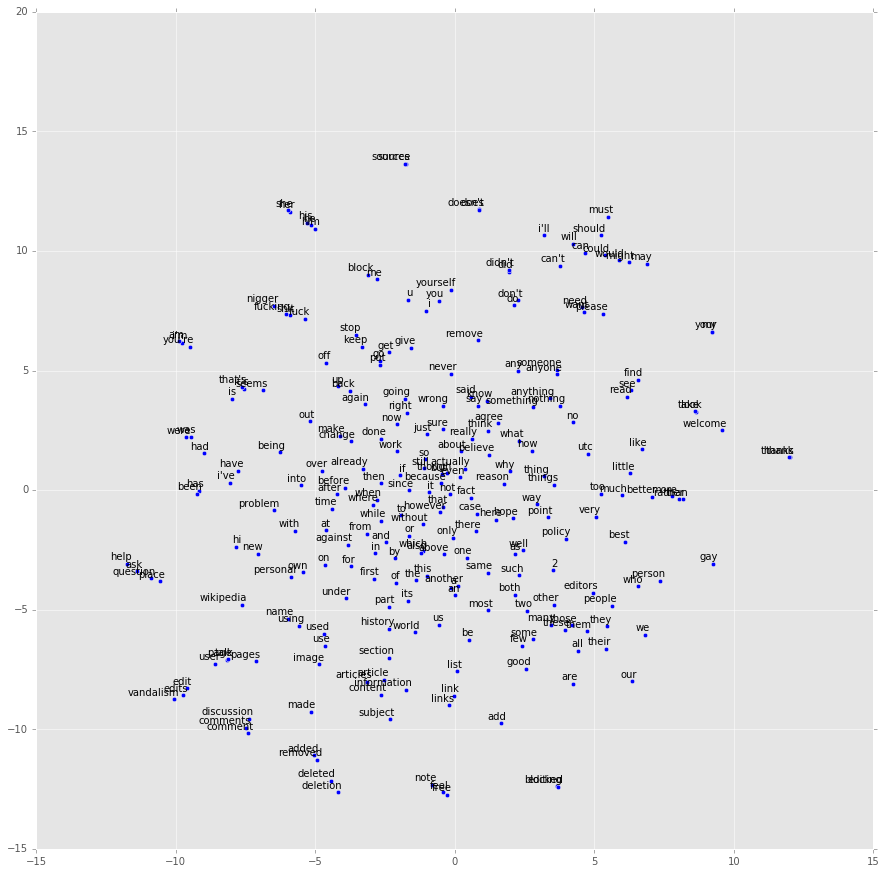

In [49]:
from matplotlib import pylab
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(15,15))  # in inches
    pylab.style.use('ggplot')
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                       ha='right', va='bottom')
    pylab.show()

plot(two_d_embeddings, index2word[:num_points])